In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
things = ["First Name", "Last Name"]

def snakify(txt):
    "return string in snake_case"
    return txt.replace(" ","_").lower()

print [snakify(thing) for thing in things]


snakify( "My Name is Greg" )

['first_name', 'last_name']


'my_name_is_greg'

In [2]:
! pwd

/Users/yzy1986/Eugene's/Kaggle/Titanic


In [4]:
!ls -lt

total 9528
-rw-r--r--   1 yzy1986  staff       72 Jun 19 18:17 Data Science in Python (that).ipynb
-rw-r--r--   1 yzy1986  staff   112891 Jun 19 18:17 Introduction to Scikit-Learn (Astro 599).ipynb
-rw-r--r--   1 yzy1986  staff    50274 Jun  7 23:31 Chicago Budget Appropriations.ipynb
-rw-r--r--   1 yzy1986  staff    61087 Jun  6 21:16 10 Minutes to pandas.ipynb
-rw-r--r--   1 yzy1986  staff       72 Jun  6 20:03 Indexing and Selecting Data.ipynb
-rw-r--r--   1 yzy1986  staff    23235 Jun  6 20:03 Ethnic Groups moving out of Louisiana.ipynb
-rw-r--r--   1 yzy1986  staff    26836 Jun  5 18:52 Dropout Rate and Median Income.ipynb
-rw-r--r--@  1 yzy1986  staff     8856 Jun  5 17:45 dropoutrates.csv
-rw-r--r--   1 yzy1986  staff    63620 Jun  5 17:41 CPS Algebra Exit Exams.ipynb
-rw-r--r--   1 yzy1986  staff    15969 Jun  5 17:35 Pandas.ipynb
-rw-r--r--   1 yzy1986  staff   295290 May 29 17:28 A Crash Course in Python.ipynb
-rw-r--r--   1 yzy1986  staff    34913 May 29 14:20 Berkeley AI Py

In [5]:
# download salary_data.csv save contents to 
# a local file in the same directory as this notebook
!curl http://www.justinmrao.com/salary_data.csv >> ./salary_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  381k  100  381k    0     0  56469      0  0:00:06  0:00:06 --:--:-- 93365


In [6]:
# peak at the first row
! head -n 1 salary_data.csv | tr -s "," "\n"

team
year
player
contract_years_remaining
contract_thru
position
full_name
salary_year
salary_total
year_counter
obs
mean_salary



In [7]:
# peak at the second row
! head -n+2 salary_data.csv | tail -n-1 | tr -s "," "\n"

"Boston Celtics"
"2002-03"
"Bremer
 J.R."
1
"2002-03"
"G"
" Bremer"
349458
349458
1
2
456568.5



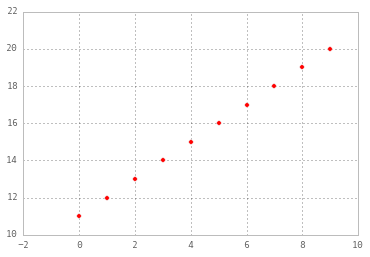

In [5]:
import pylab as pl
x = range(10)
y = range(11, 21)
pl.scatter(x, y, c = 'r')

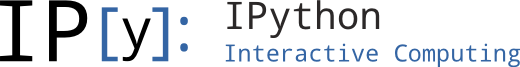

In [6]:
# Render images from the web via a url or images on your local computer via the filename.
from IPython.display import Image
Image("http://ipython.org/_static/IPy_header.png")

#### NumPy

In [7]:
# ndarray is like a python list but more efficient
def list_times(alist, scalar):
    for i, val in enumerate(alist):
        alist[i] = val * scalar
    return alist

In [9]:
arr = np.arange(1e7)

In [10]:
l = arr.tolist()

In [11]:
%timeit arr*1.1

10 loops, best of 3: 67.3 ms per loop


In [12]:
%timeit list_times(l, 1.1)

1 loops, best of 3: 1.69 s per loop


In [13]:
# ndarrays behave like lists
print "len(l)", len(l)
print "len(arr)", len(arr)

len(l) 10000000
len(arr) 10000000


In [14]:
# ndarray capable of more advanced slicing
l = [ [1,2], [3,4] ]
arr   = np.array(l)

print "Value in Row One, Column One: %d" % l[0][0]
print "Value in Row One, Column One: %d" % arr[0,0]
print "Value in All Rows, Column Two: %s" % str(arr[::,1])
print "Value in Row Two, Both Columns: %s" % str(arr[1::,])

Value in Row One, Column One: 1
Value in Row One, Column One: 1
Value in All Rows, Column Two: [2 4]
Value in Row Two, Both Columns: [[3 4]]


In [24]:
# You can access elements stored in an ndarray using arr[] sub notation arr[rows, columns].


array([3, 4])

In [25]:
zero_to_1000 = np.arange(0,1000)               # create an array of integers from 0 to 1000
zero_to_1000 = zero_to_1000.reshape( (500,2) ) # reshape into 2 dimensions (500 Rows x 2 Cols2)
zero_to_1000[:100, 1]                          # select the 2nd columns from the top 100 rows

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

In [26]:
# NumPy arrays support boolean indexing for selection
numbers = np.random.uniform(size=100)
numbers = numbers.reshape((50,2))
mask = (numbers >= 0.7) & (numbers <= 0.9)
mask[:10]

array([[False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False]], dtype=bool)

In [28]:
numbers[mask] # pass the boolean mask to the array using sub notation

array([ 0.83402689,  0.84387134,  0.85967494,  0.7340453 ,  0.79018056,
        0.74343798,  0.89290592,  0.89070589,  0.79231693,  0.74505952,
        0.72108173,  0.88393288,  0.78454352,  0.88691002,  0.79797695,
        0.8357899 ,  0.77497177,  0.84052428,  0.70187732,  0.83109123,
        0.80190403,  0.77096282,  0.86291631])

#### Matplotlib

In [30]:
# make some data to plot
x = np.linspace(start = 0, stop = 2*np.pi, num = 50)
y1 = np.sin(x)
y2 = np.cos(x)

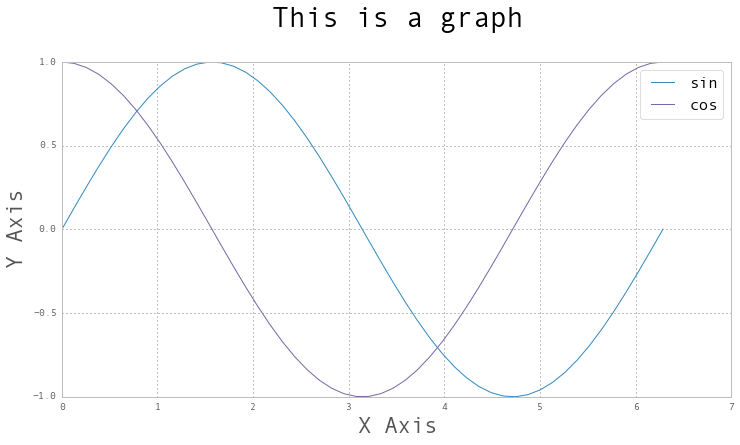

In [32]:
# plot
fig, ax = plt.subplots(1, figsize = (12, 6))
ax.plot(x, y1, label = 'sin')
ax.plot(x, y2, label = 'cos')

ax.legend(fontsize = 16)
ax.axes.xaxis.set_label_text('X Axis', fontdict = {'size': 22})
ax.axes.yaxis.set_label_text('Y Axis', fontdict = {'size': 22})

ax.title.set_text('This is a graph\n')
ax.title.set_fontsize(28)



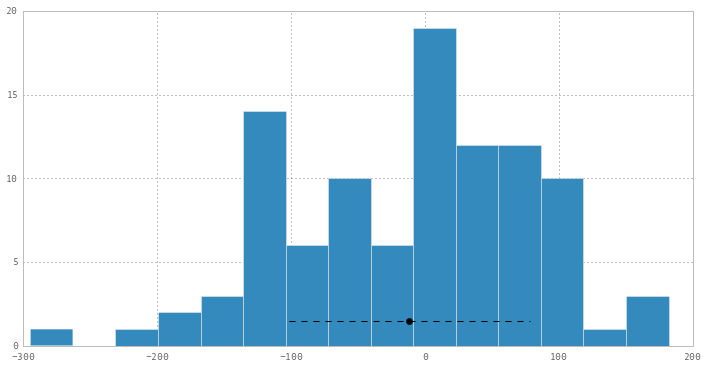

In [6]:
# histograms
d = np.random.randn(100) * 100
m = d.mean()
s = d.std()
m_y = 1.5

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot()
ax.hist(d, 15)
ax.plot(m, m_y, 'ko')
ax.plot([m - s, m + s], [m_y] * 2, 'k--')


In [50]:
# multiple plots
x = np.arange(0, 100)
y = np.random.rand(100) 

{'boxes': [<matplotlib.lines.Line2D at 0x11e5fac90>],
 'caps': [<matplotlib.lines.Line2D at 0x11e5fdc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11e603e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11e603810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11e5faed0>,
  <matplotlib.lines.Line2D at 0x11e5fd5d0>]}

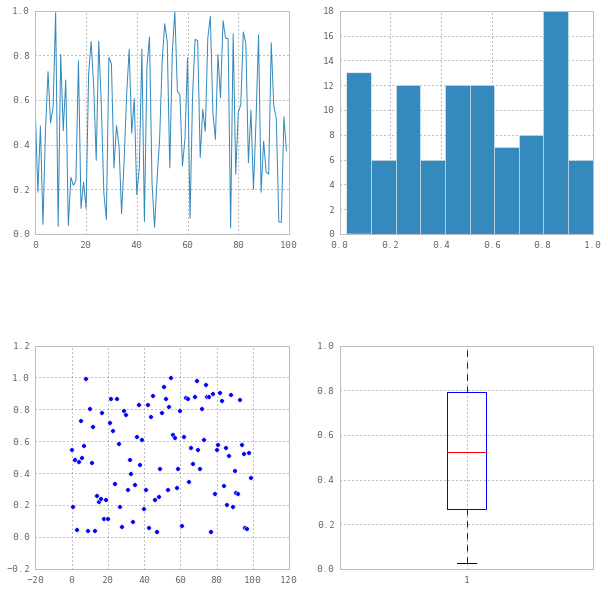

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))
ax1.plot(x, y)
ax2.hist(y)
ax3.scatter(x, y)
ax4.boxplot(y)

#### scikit-learn


A demo of structured Ward hierarchical clustering on Lena image

Compute the segmentation of a 2D image with Ward hierarchical
clustering. The clustering is spatially constrained in order
for each segmented region to be in one piece.

Compute structured hierarchical clustering...
('Elapsed time: ', 14.06224799156189)
('Number of pixels: ', 65536)
('Number of clusters: ', 15)


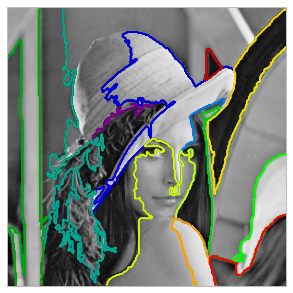

In [8]:
# %load http://scikit-learn.org/stable/_downloads/plot_lena_ward_segmentation.py
"""
===============================================================
A demo of structured Ward hierarchical clustering on Lena image
===============================================================

Compute the segmentation of a 2D image with Ward hierarchical
clustering. The clustering is spatially constrained in order
for each segmented region to be in one piece.
"""

# Author : Vincent Michel, 2010
#          Alexandre Gramfort, 2011
# License: BSD 3 clause

print(__doc__)

import time as time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

###############################################################################
# Generate data
lena = sp.misc.lena()
# Downsample the image by a factor of 4
lena = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]
X = np.reshape(lena, (-1, 1))

###############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*lena.shape)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
label = np.reshape(ward.labels_, lena.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

###############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(lena, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()


#### statsmodels

In [3]:
# read data in
df = pd.read_csv('http://www.ats.ucla.edu/stat/data/binary.csv')

In [4]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]

# create dummy variables for prestige
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [6]:
# create a clean df for regression
cols_to_keep = ['admit', 'gre', 'gpa']
dat = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

In [7]:
dat.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [8]:
# manually add the intercept
dat['intercept'] = 1.0

In [9]:
train_cols = dat.columns[1:]

In [14]:
# set params
logit = sm.Logit(endog = dat['admit'], exog = dat[train_cols])

In [19]:
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [20]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Jun 2015   Pseudo R-squ.:                 0.08292
Time:                        19:46:49   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.332      2.423      0.015         0.154     1.454
prestige_2    -0.6754      0.316     -2.134      0.0